In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mlxtend.data import loadlocal_mnist

X, y = loadlocal_mnist(
        images_path='C:/Users/deepe/OneDrive/Desktop/INSAID/datasets/mnist_dataset/train-images.idx3-ubyte', 
        labels_path='C:/Users/deepe/OneDrive/Desktop/INSAID/datasets/mnist_dataset/train-labels.idx1-ubyte')


np.savetxt(fname='C:/Users/deepe/OneDrive/Desktop/INSAID/datasets/mnist_dataset/images.csv', 
           X=X, delimiter=',', fmt='%d')
np.savetxt(fname='C:/Users/deepe/OneDrive/Desktop/INSAID/datasets/mnist_dataset/labels.csv', 
           X=y, delimiter=',', fmt='%d')

In [3]:
#create the read_data file just by entering column names as X1 to X784 in excel and save it as image_data.csv
# also upload the file in the jupyter notebook.

In [4]:
data = pd.read_csv("image_data.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, X1 to X784
dtypes: int64(784)
memory usage: 358.9 MB


In [6]:
labels = pd.read_csv("labels.csv", header = None)
labels.head()

,0
0,5
1,0
2,4
3,1
4,9


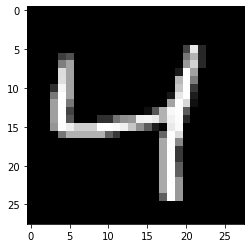

In [7]:
im = data.iloc[[2]].values.reshape(28,28)
plt.imshow(im, cmap = 'gray')

In [8]:
#60K data points
#logR 60K data points - 10 mins

#PCA + Log R 60K data points:
# PCA subset points - 4 mins
# LogR - 5 mins
#-----
#total = 9 mins

In [9]:
data = data/255 #0-255 original range. simply divide by 255 to get between 0 and 1

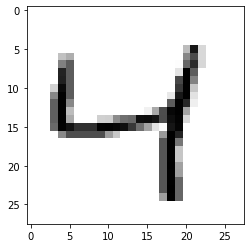

In [10]:
im = data.iloc[[2]].values.reshape(28,28)
plt.imshow(1-im, cmap = 'gray')

In [11]:
from sklearn.model_selection import train_test_split
X_remaining, X_pca, y_remaining, y_pca = train_test_split(data, labels, test_size=0.20, random_state=1)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(.95).fit(X_pca)

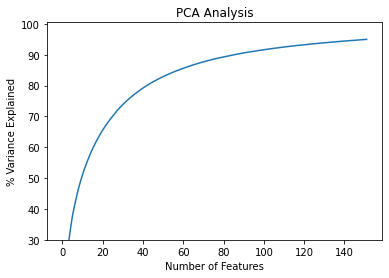

In [13]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [14]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

152 components explain 95% of the variation in data


In [15]:
X_remaining_t = pca.transform(X_remaining)
print(X_remaining_t.shape)

(48000, 152)


In [16]:
X_pca_t = pca.transform(X_pca)
print(X_pca_t.shape)

(12000, 152)


In [17]:
X_remaining_t = pd.DataFrame(data = X_remaining_t)
X_remaining_t

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,-3.712372,1.945538,0.450082,0.794512,-1.950731,-0.345740,0.874696,-0.854089,0.464508,0.644386,...,-0.019180,-0.025598,-0.026735,-0.109080,0.053386,-0.072074,0.039530,-0.103535,-0.120215,-0.014980
1,-0.414760,2.511296,0.186549,0.007441,-1.396713,-1.670959,0.363096,3.367955,-0.822066,0.405522,...,0.081877,0.091143,0.008880,-0.210080,-0.016372,0.083268,0.027945,0.075623,-0.252100,0.140186
2,0.784654,-3.178400,-2.034143,0.468934,2.971191,-0.045844,-2.567247,1.125410,1.260016,-0.828274,...,0.165566,-0.276178,-0.049925,0.050088,0.081196,-0.226976,-0.124900,0.258319,-0.144206,-0.118334
3,3.827622,1.902929,-1.973395,2.334144,-2.981059,2.925701,1.481672,-0.787084,-0.280305,-0.641176,...,-0.057671,-0.306564,0.026720,0.069404,0.226614,0.218539,-0.162855,0.135332,-0.156669,0.202891
4,-0.564723,2.322513,-3.387883,0.501219,-0.051344,0.138719,-0.539204,1.071504,0.939488,1.979388,...,0.035030,-0.264958,0.010292,-0.109745,-0.040442,0.128520,-0.031348,0.087149,-0.235833,0.150625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,3.717659,1.213195,-1.905806,1.011942,-1.290403,1.233094,0.612679,-0.613249,-0.507480,1.246243,...,-0.054122,-0.042153,-0.028733,-0.118308,-0.171437,0.001221,-0.004366,-0.053061,0.099731,0.232037
47996,-2.190107,1.759481,1.229115,0.006218,-1.150191,0.769205,-1.689851,0.952036,1.068688,1.207000,...,-0.270083,-0.024136,-0.115213,0.078473,0.083537,0.009609,-0.022400,0.038341,-0.167761,0.006794
47997,2.532720,1.515028,-1.448272,0.415453,1.129857,1.311633,-0.693281,-2.186286,2.251010,-0.008008,...,-0.214531,-0.184075,-0.143491,-0.108771,-0.172442,0.181558,0.044043,0.030003,-0.047040,-0.150601
47998,-1.201466,-2.443136,-1.581340,-0.604023,1.129608,-0.982210,-1.311065,-0.583510,-0.205210,-1.634047,...,0.106962,0.040560,0.080211,0.043495,0.029215,0.032695,0.118213,0.013172,-0.115678,-0.095888


In [18]:
X_pca_invt=pca.inverse_transform(X_pca_t)
print(X_pca_invt.shape)

(12000, 784)


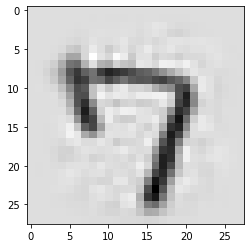

In [19]:
X_pca_invt = pd.DataFrame(data = X_pca_invt)
im = X_pca_invt.iloc[[2]].values.reshape(28,28)
plt.imshow(1-im, cmap = 'gray')

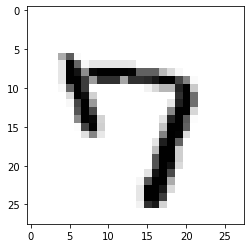

In [20]:
im = X_pca.iloc[[2]].values.reshape(28,28)
plt.imshow(1-im, cmap = 'gray')

In [21]:
#train
#X_remaining_t, y_remaining

#test
# X_pca_t, y_pca 

In [22]:
from sklearn.svm import SVC
cl = SVC()
cl.fit(X_remaining_t, y_remaining)
Ypredict_pca = cl.predict(X_pca_t)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(Ypredict_pca,y_pca))

Accuracy score for test data is: 0.9841666666666666


In [24]:
Ypredict_pca

array([3, 2, 7, ..., 0, 0, 0], dtype=int64)

In [26]:
cl.predict(pca.transform(data.iloc[[2]]))

array([4], dtype=int64)